In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# load data
X, y = load_breast_cancer(return_X_y=True)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"acc of training set: {tree.score(X_train, y_train):.3f}")
print(f"acc of test set: {tree.score(X_test, y_test):.3f}")

acc of training set: 1.000
acc of test set: 0.916


In [2]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
print(f"acc of training set: {tree.score(X_train, y_train):.3f}")
print(f"acc of test set: {tree.score(X_test, y_test):.3f}")

acc of training set: 0.988
acc of test set: 0.930


In [3]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=["malignant", "benign"],
                feature_names=load_breast_cancer().feature_names, impurity=False, filled=True)

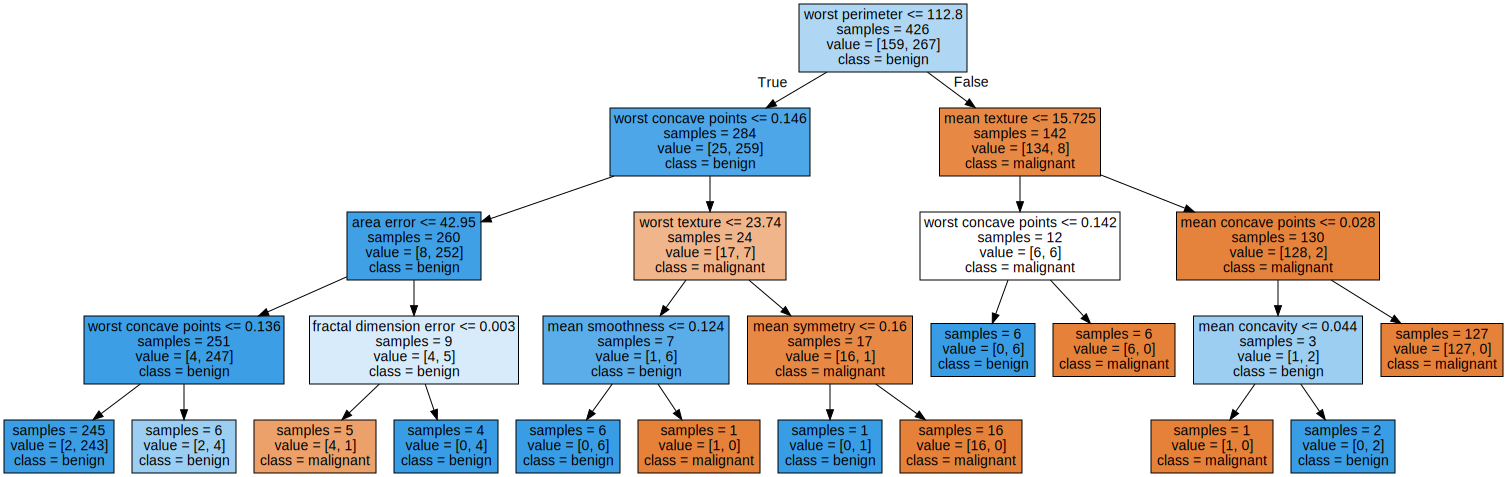

In [4]:
import graphviz

with open("tree.dot") as f:
    graph = f.read()
graphviz.Source(graph)

In [5]:
print(f"feature importance:\n{tree.feature_importances_}")

feature importance:
[0.         0.02700566 0.         0.         0.00897176 0.
 0.00697803 0.013634   0.00985134 0.         0.         0.
 0.         0.0166988  0.         0.         0.         0.
 0.         0.01488647 0.         0.03307602 0.72543275 0.
 0.         0.         0.         0.14346517 0.         0.        ]


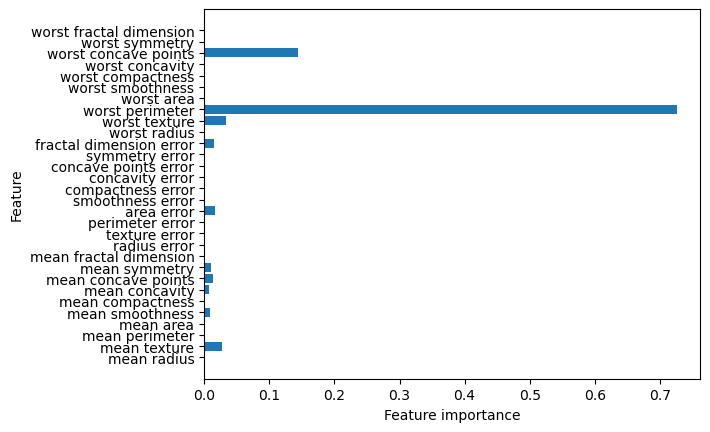

In [6]:
import matplotlib.pyplot as plt

def plot_feature_importance_cancer(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(range(n_features), load_breast_cancer().feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importance_cancer(tree)

In [7]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=100, random_state=42, noise=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

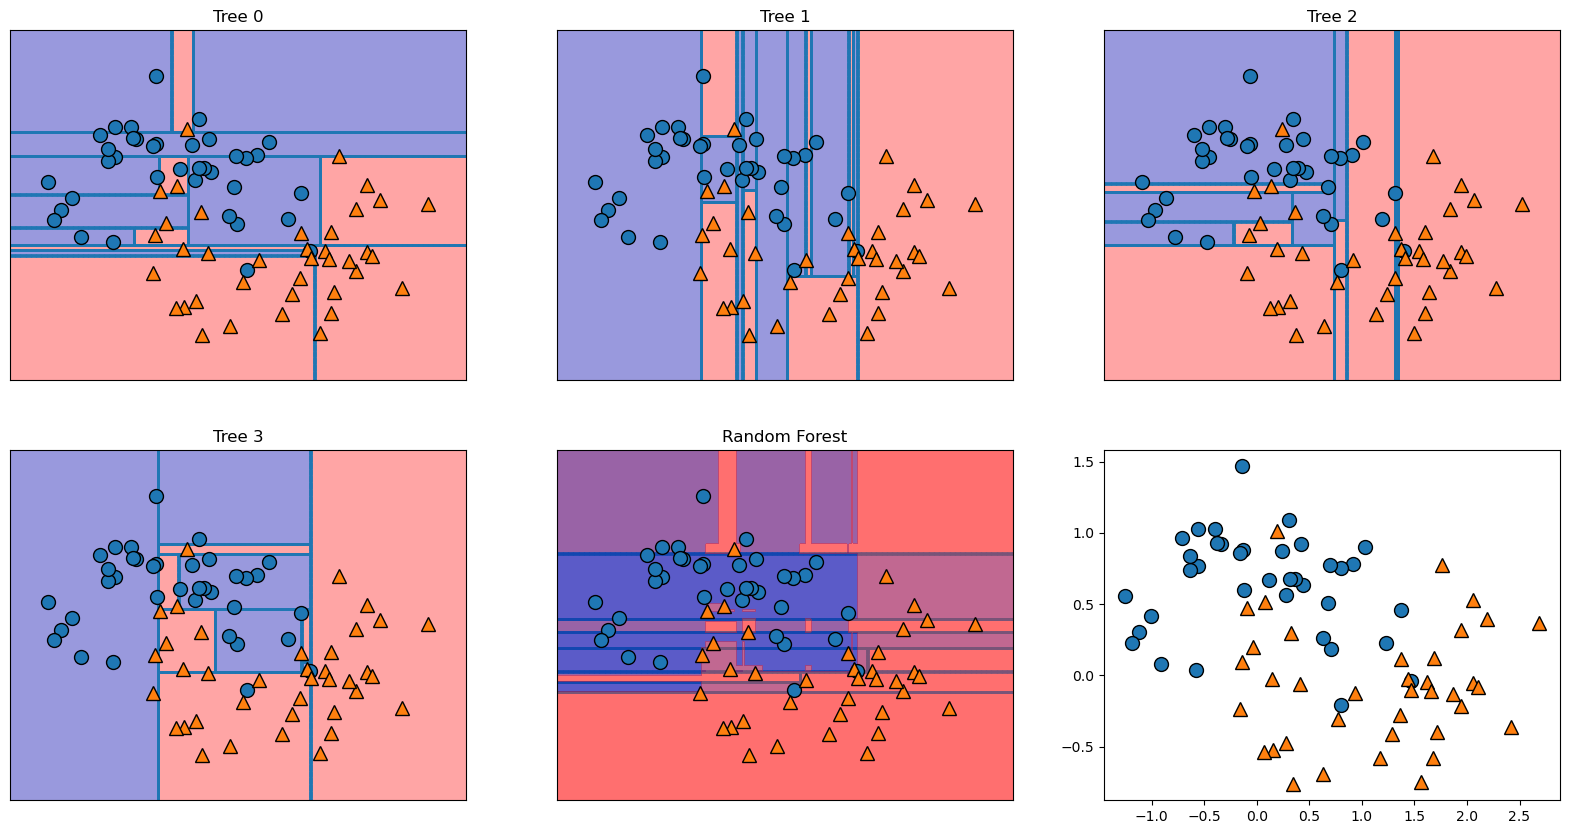

In [8]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, 1], alpha=0.4)
axes[-1, 1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.960


In [10]:
gbrt = GradientBoostingClassifier(random_state=42, max_depth=1)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 0.960
Accuracy on test set: 0.920


In [11]:
gbrt = GradientBoostingClassifier(random_state=42, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 0.960
Accuracy on test set: 0.960


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (30).

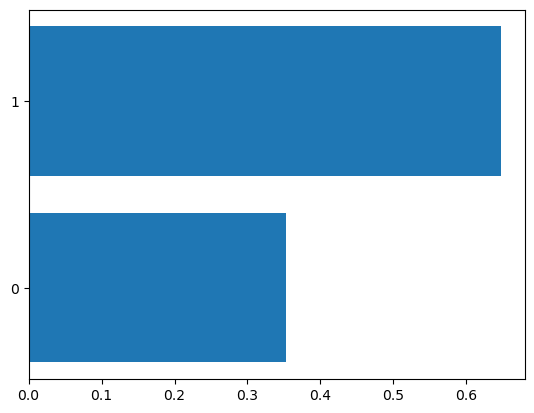

In [12]:
gbrt = GradientBoostingClassifier(random_state=42, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance_cancer(gbrt)